# Worldwide COVID-19 Data (Using QGIS) - A77310

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/20/20  4/21/20  4/22/20  4/23/20  \
0        0        0        0  ...     1026     1092     1176     1279   
1        0        0        0  ...      584      609      634      663   
2        0        0        0  ...     2718     2811     2910     3007   
3        0        0        0  ...      717      717      723      723   
4        0        0        0  ...       24       24       25       25   

   4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  
0     1351     1463     1531     1703     1828     1939  
1      678      712      726      736      750      766  
2     3127     3256     3382     3517     3649     3848  
3      731      738      738      743      743      743  
4       25       25       26       27       27       27  

[5 rows x 103 columns]

In [29]:
# World Population Data from: https://datahub.io/JohnSnowLabs/population-figures-by-country#resource-population-figures-by-country_zip
popData = pd.read_csv("population-figures-by-country-csv_csv.csv")

In [30]:
popData = popData.drop(popData.iloc[:, 1:58], axis=1)
popData.set_index("Country", inplace=True)
popData = popData.sum(axis = 1)
popData = popData.sort_values(ascending=False)

popData.head()

Country
World                  7.442136e+09
IDA & IBRD total       6.271593e+09
Low & middle income    6.247923e+09
Middle income          5.592833e+09
IBRD only              4.697247e+09
dtype: float64

# Data Handling for Easier Presentation

We're gonna handle the data a bit for easier graph managing. However, we're preserving the initial dataframe for QGIS use later.

In [31]:
data = df.drop(columns=['Province/State', 'Lat', 'Long'])
data[data.duplicated(['Country/Region'])]

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
9         Australia        0        0        0        0        3        4   
10        Australia        0        0        0        0        0        0   
11        Australia        0        0        0        0        0        0   
12        Australia        0        0        0        0        0        0   
13        Australia        0        0        0        0        0        0   
..              ...      ...      ...      ...      ...      ...      ...   
250  United Kingdom        0        0        0        0        0        0   
251  United Kingdom        0        0        0        0        0        0   
256     Netherlands        0        0        0        0        0        0   
258  United Kingdom        0        0        0        0        0        0   
259          France        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  4/20/20  4/21/20  4/22/20  4/23/20  \
9          4        4        4  ...     2963     2969     2971     2976   
10         0        0        0  ...       28       28       28       28   
11         0        1        3  ...     1019     1024     1024     1026   
12         0        0        0  ...      435      437      438      438   
13         0        0        0  ...      200      201      205      207   
..       ...      ...      ...  ...      ...      ...      ...      ...   
250        0        0        0  ...        5        5        5        5   
251        0        0        0  ...       11       11       11       11   
256        0        0        0  ...        5        5        5        5   
258        0        0        0  ...       11       11       11       12   
259        0        0        0  ...        1        1        1        1   

     4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  
9       2982     2994     3002     3004     3016     3016  
10        28       28       28       28       28       28  
11      1026     1026     1030     1033     1034     1033  
12       438      438      438      438      438      438  
13       207      207      212      214      218      219  
..       ...      ...      ...      ...      ...      ...  
250        5        6        6        6        6        6  
251       11       11       11       12       12       12  
256        5        5        5        5        5        5  
258       13       13       13       13       13       13  
259        1        1        1        1        1        1  

[79 rows x 100 columns]

In [32]:
data = data.groupby(['Country/Region']).sum().reset_index()
data = data.rename(columns={"Country/Region": "Country"})
data.set_index("Country", inplace=True)

data.loc['US']

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
            ...   
4/25/20     938154
4/26/20     965785
4/27/20     988197
4/28/20    1012582
4/29/20    1039909
Name: US, Length: 99, dtype: int64

Now, to visualize how many COVID cases have been reported total in each country, we'll make a sum of all columns and store them in another dataframe but only after summing all the duplicates.

In [33]:
length = len(data.columns.tolist())
date = data.columns.tolist()[-1]

sumdata = data[date]
sumdata = sumdata.sort_values(ascending=True)

sumdata

Country
Yemen                          6
Western Sahara                 6
Bhutan                         7
Sao Tome and Principe          8
Mauritania                     8
                          ...   
United Kingdom            166441
France                    166543
Italy                     203591
Spain                     212917
US                       1039909
Name: 4/29/20, Length: 185, dtype: int64

As we can see, the growth of the number of infected in relation to the country appears to scale exponentially, so we'll build a graph with a logarithmic scale

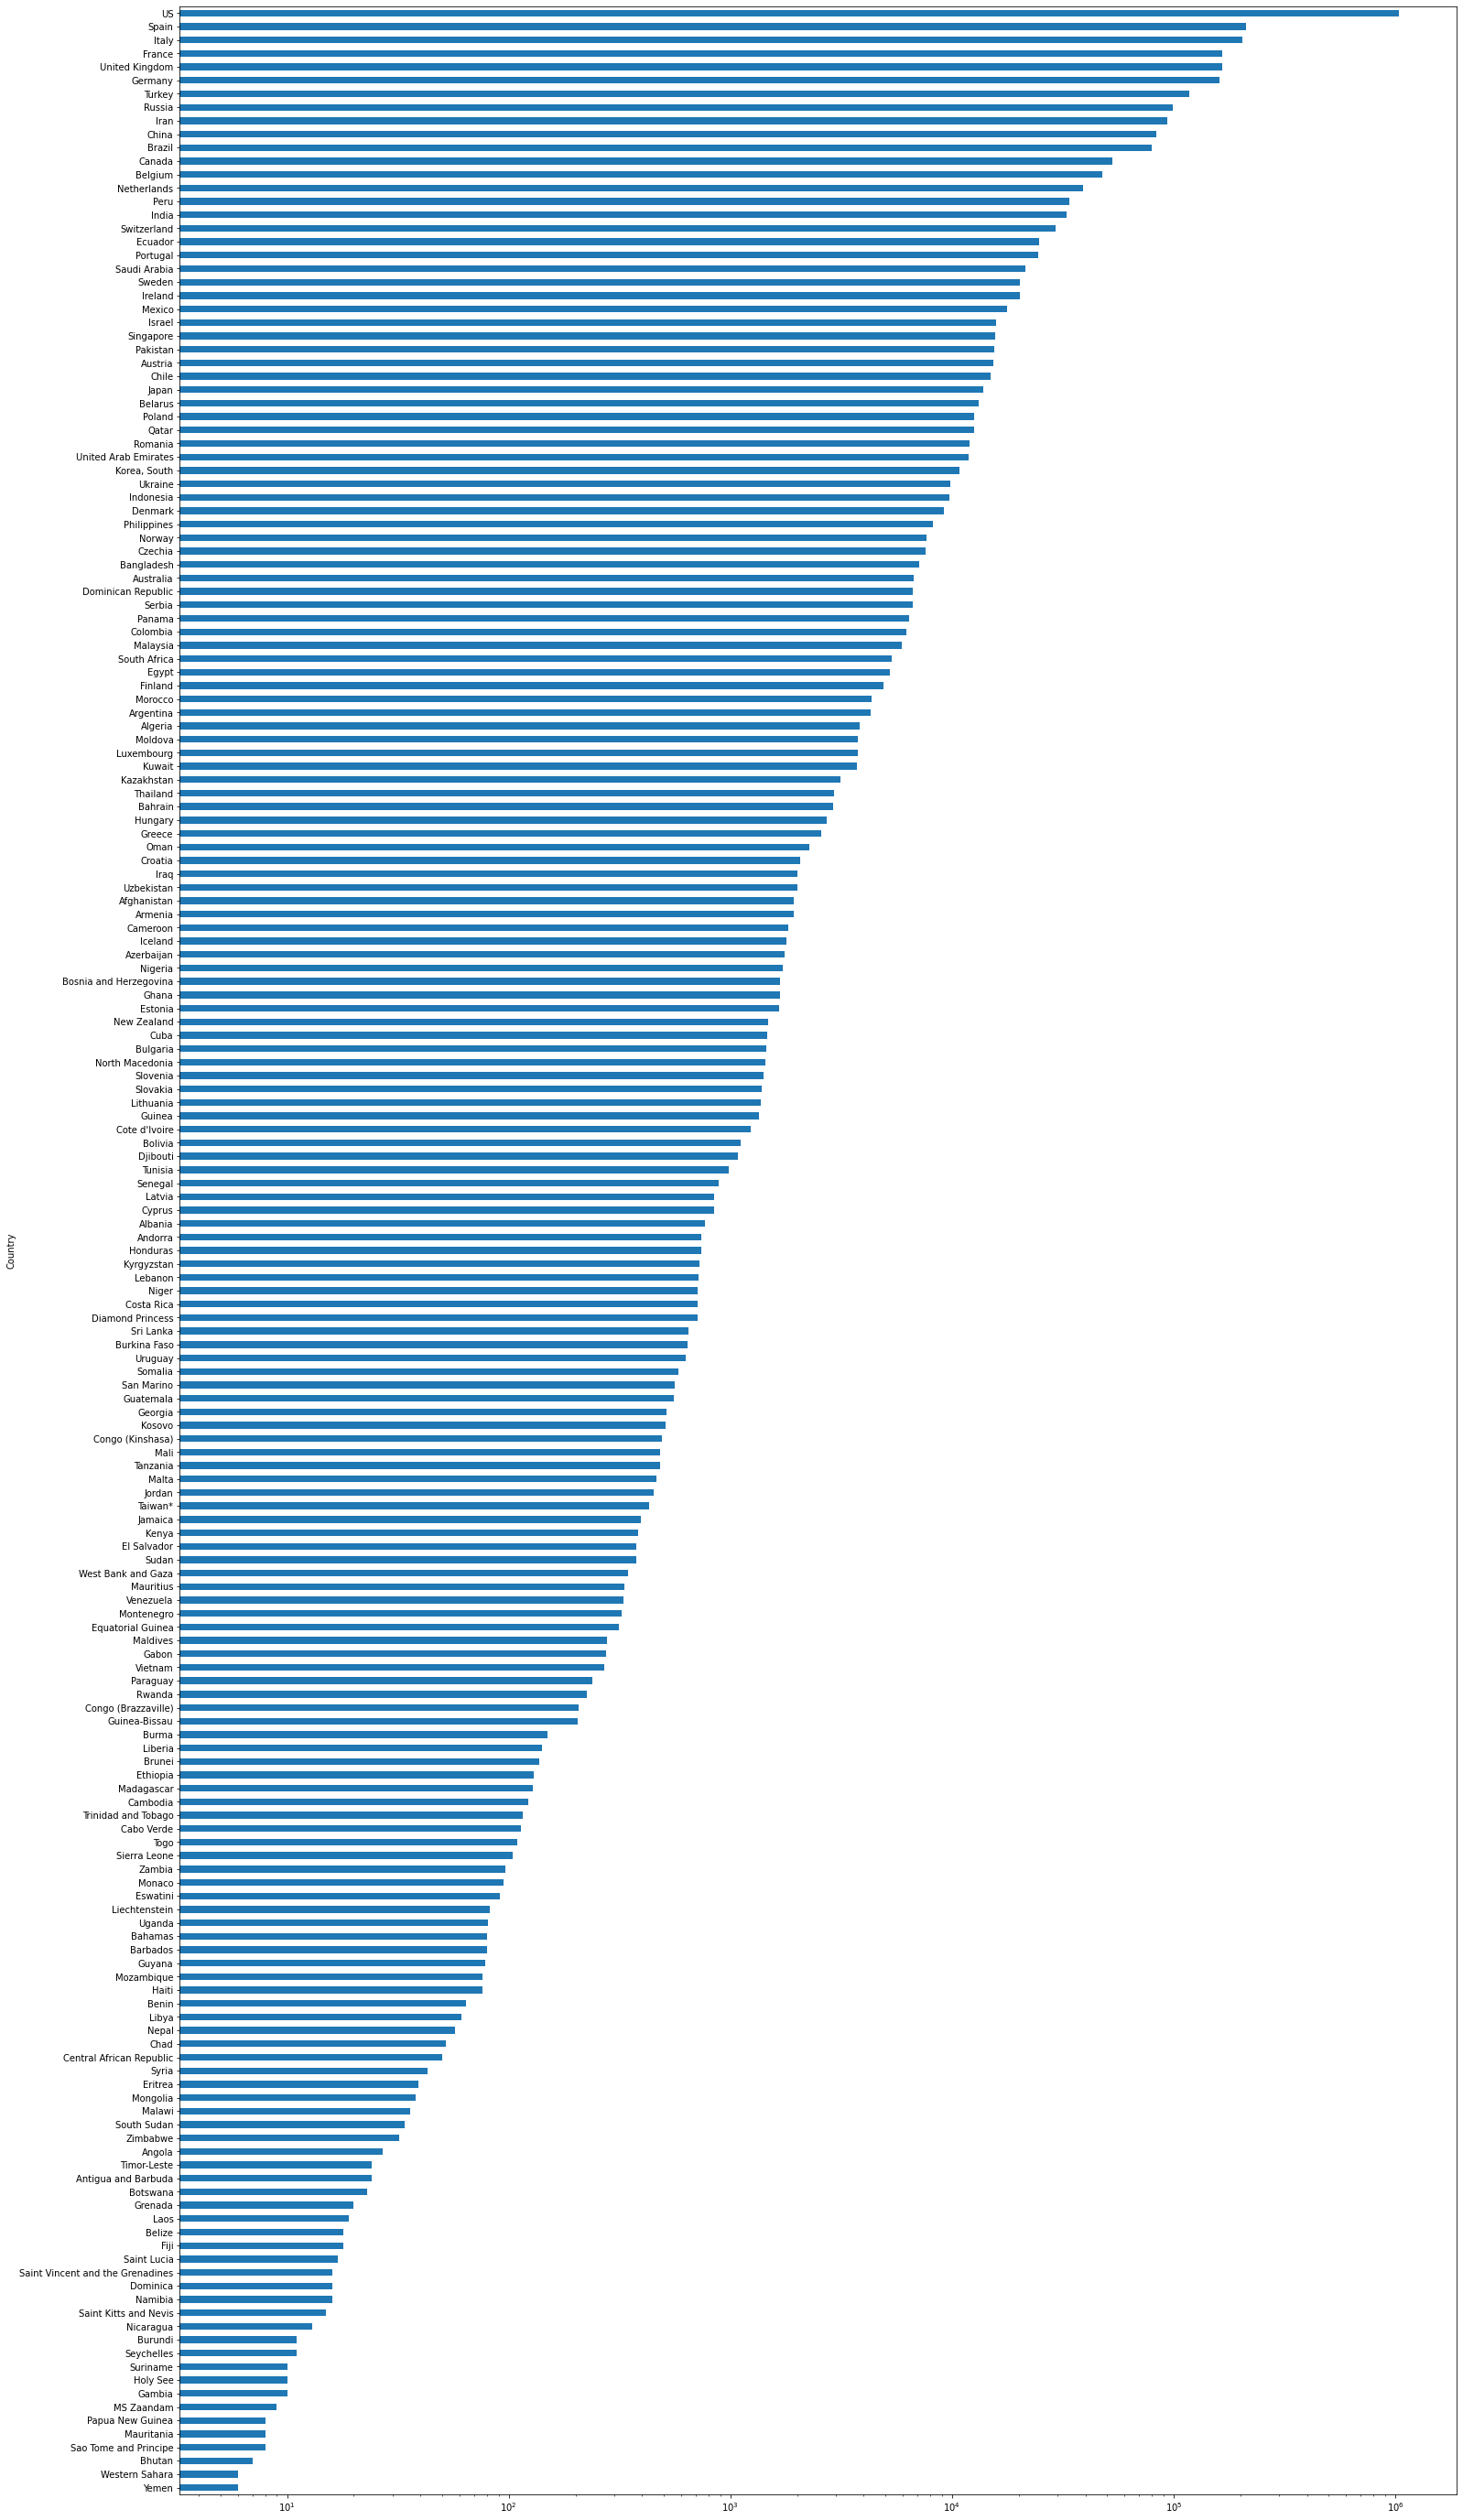

In [34]:
sumdata.plot.barh(figsize=(25,50))
plt.xscale("log")
plt.show()

# Studying the most effected countries since January

First, we're going to take a look at how the landscape has shifted over time via some animated bar graphs and, afterwards, we're going to explore the growth of cases per day in the US, Italy and China.

In [35]:
def draw_barchart(col):
    dff = data.iloc[:,col].sort_values(ascending=True).tail(10)
    ax.clear()
    ax.barh(dff.index, dff.values)
    dx = dff.values.max() / 200
    for i, (value, name) in enumerate(zip(dff.values, dff.index)):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, list(df.columns)[col], transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'COVID cases by country since 22/1/2020',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    plt.box(False)

This next part is animated though Github does not show it for some reason.

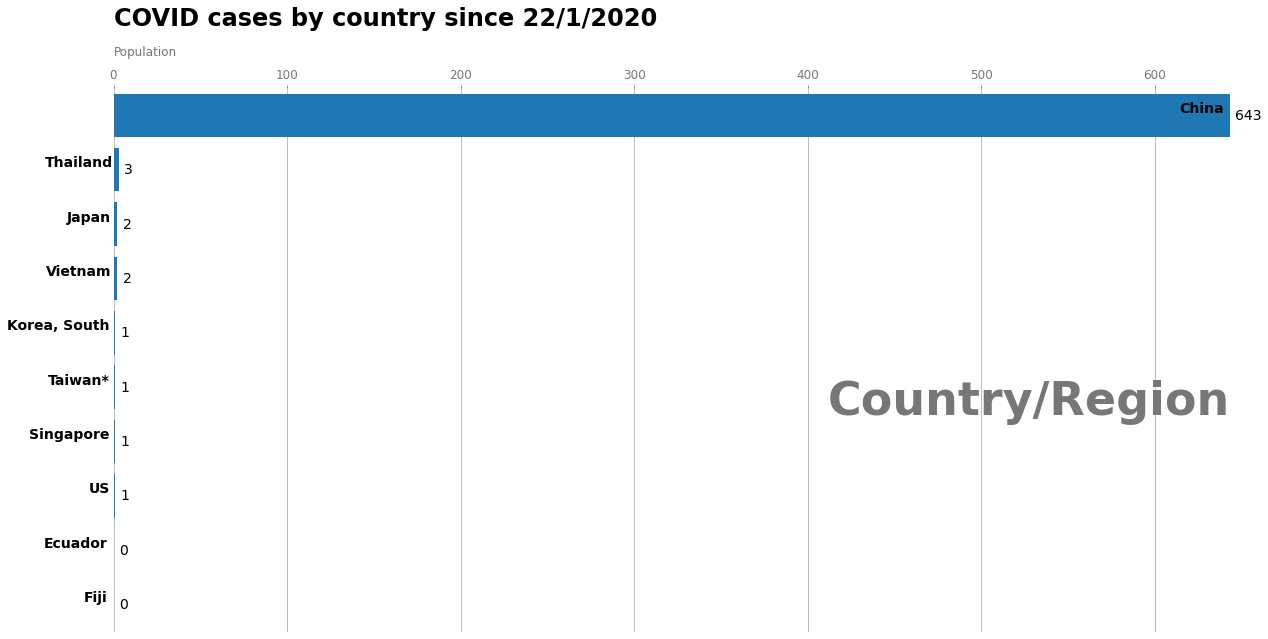

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1, 98))
HTML(animator.to_jshtml())

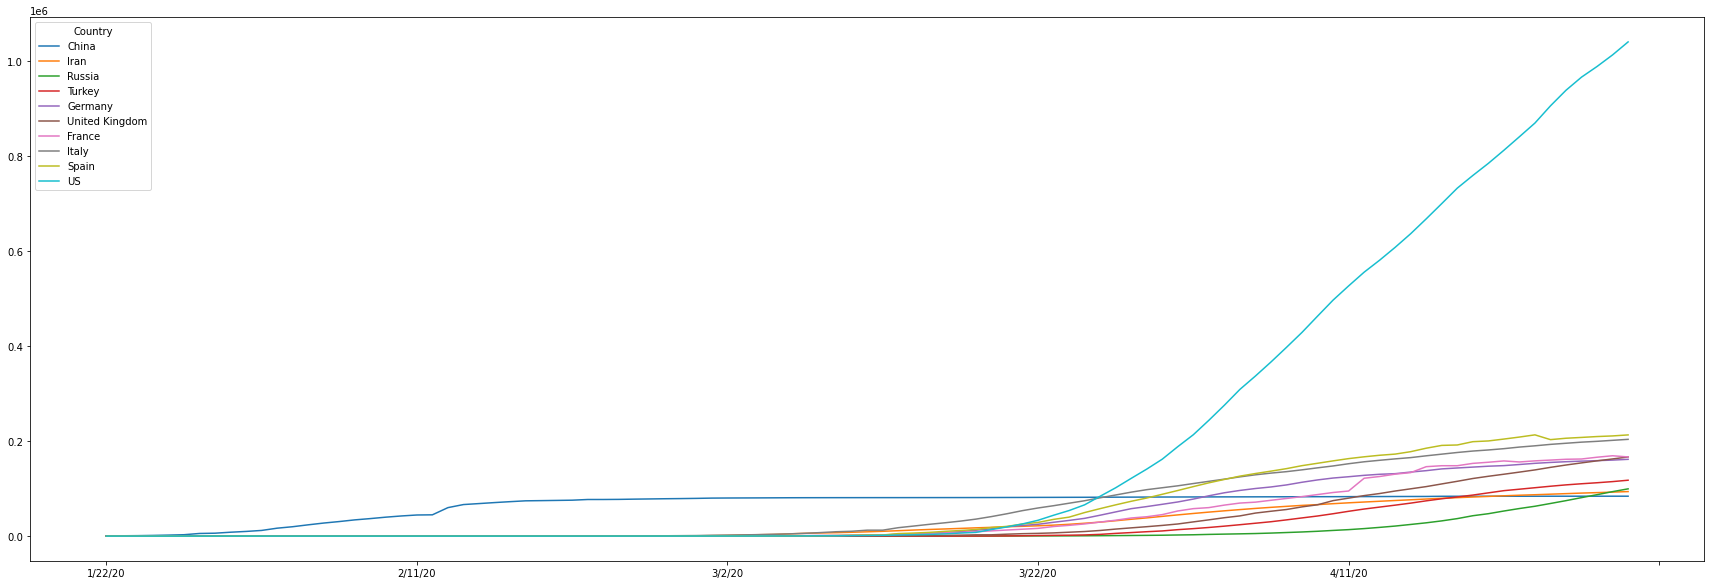

In [37]:
dff = data.sort_values(by="4/29/20", ascending=True).tail(10)
dff = dff.transpose()
dff.plot.line(figsize=(30,10))

# United States

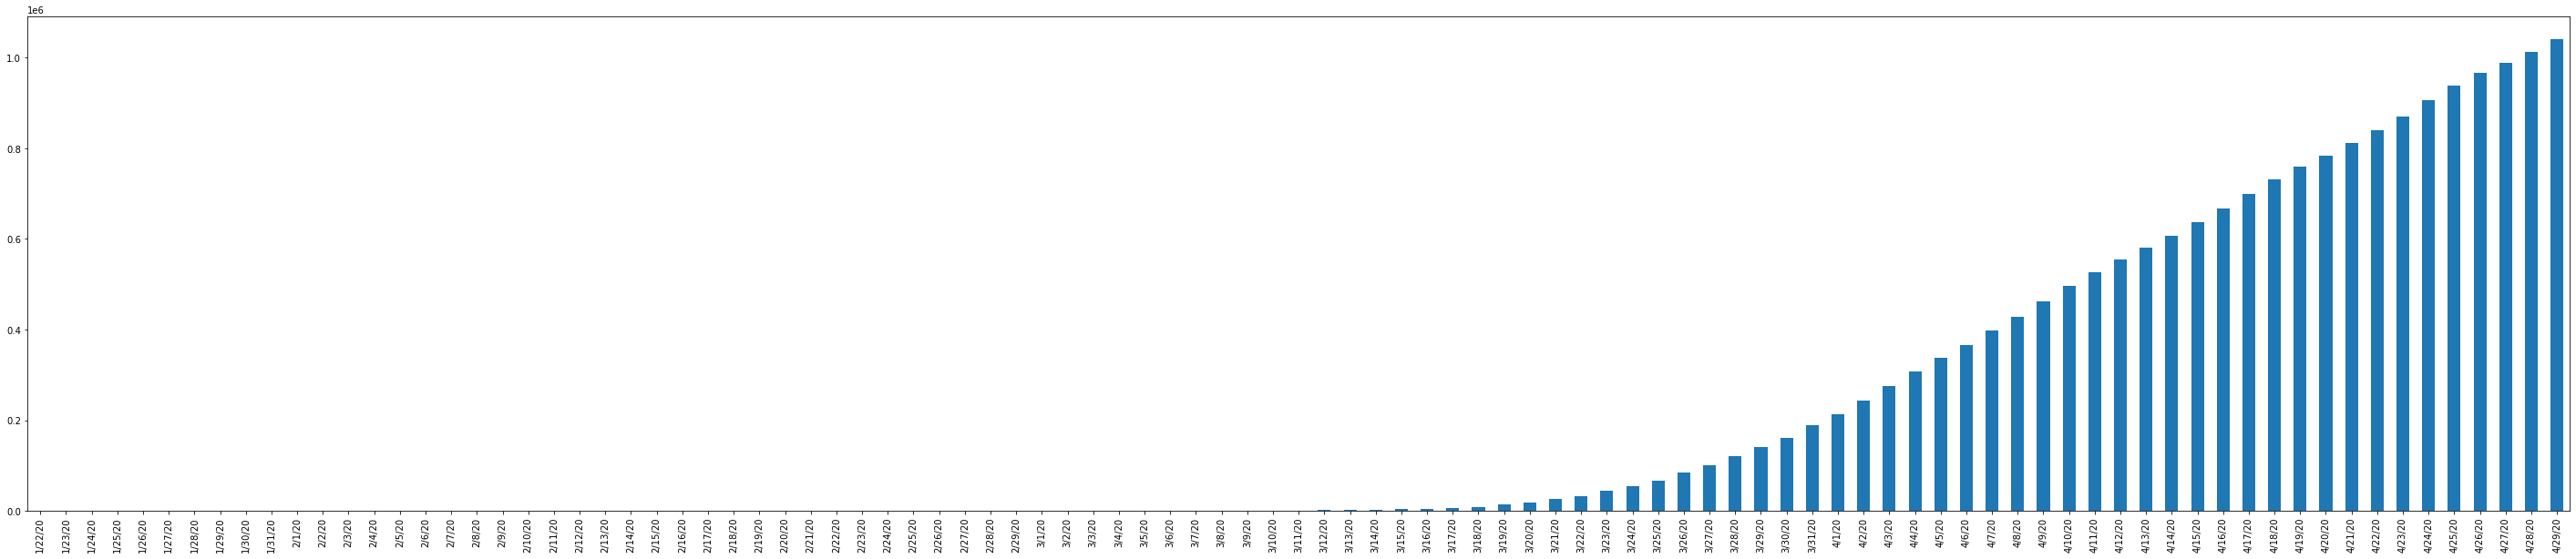

In [38]:
tempData = data.loc['US']
tempData.plot.bar(figsize=(50,10))
plt.show()

# China

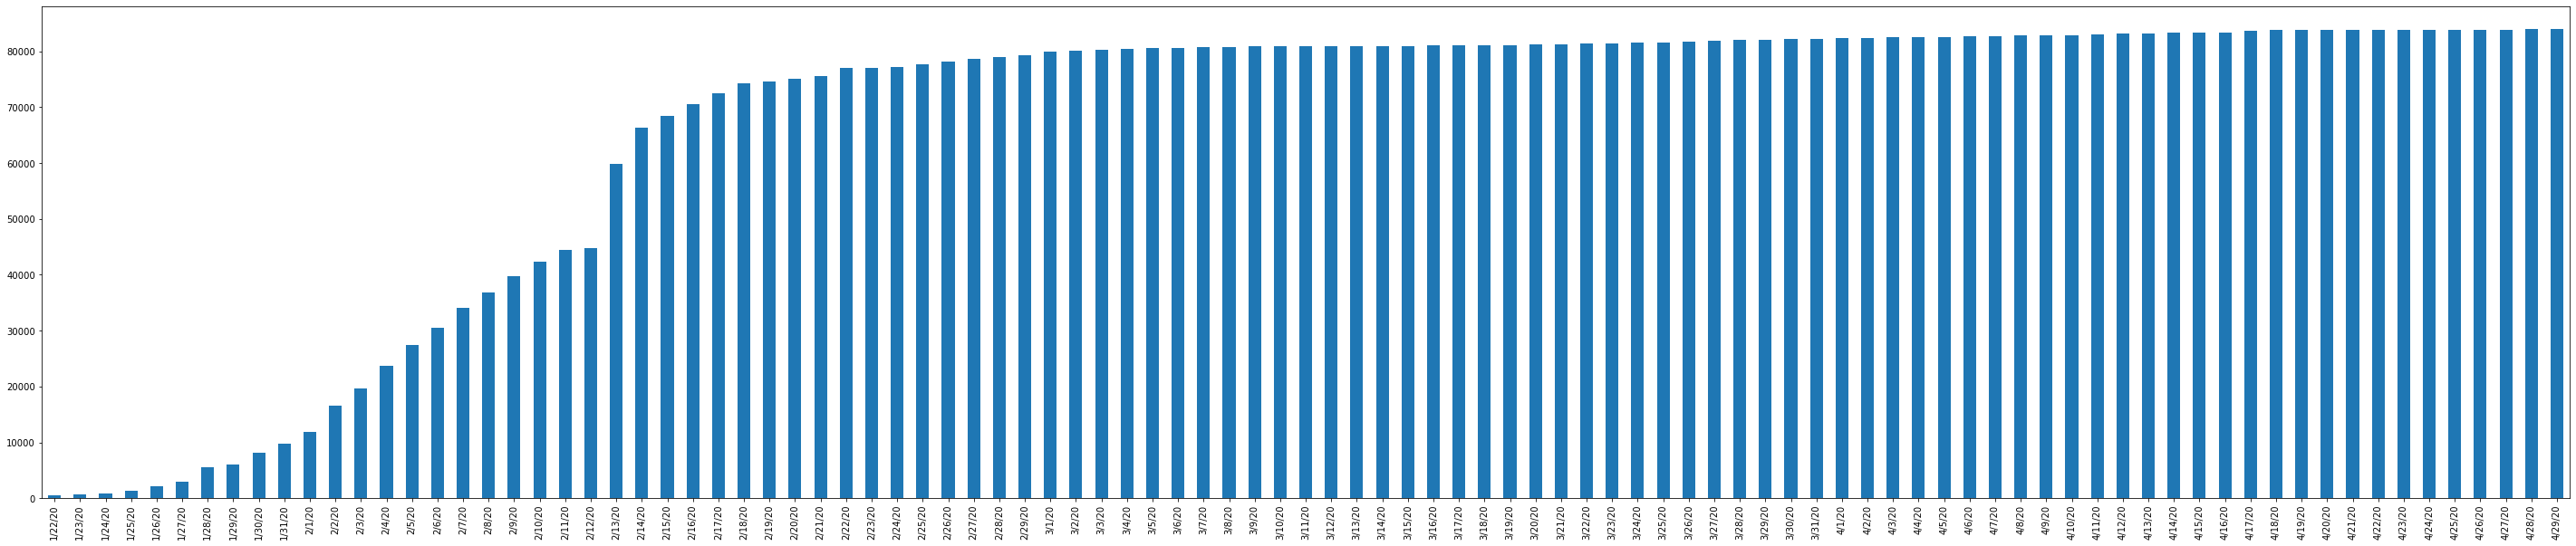

In [39]:
tempData = data.loc['China']
tempData.plot.bar(figsize=(50,10))
plt.show()

# Italy

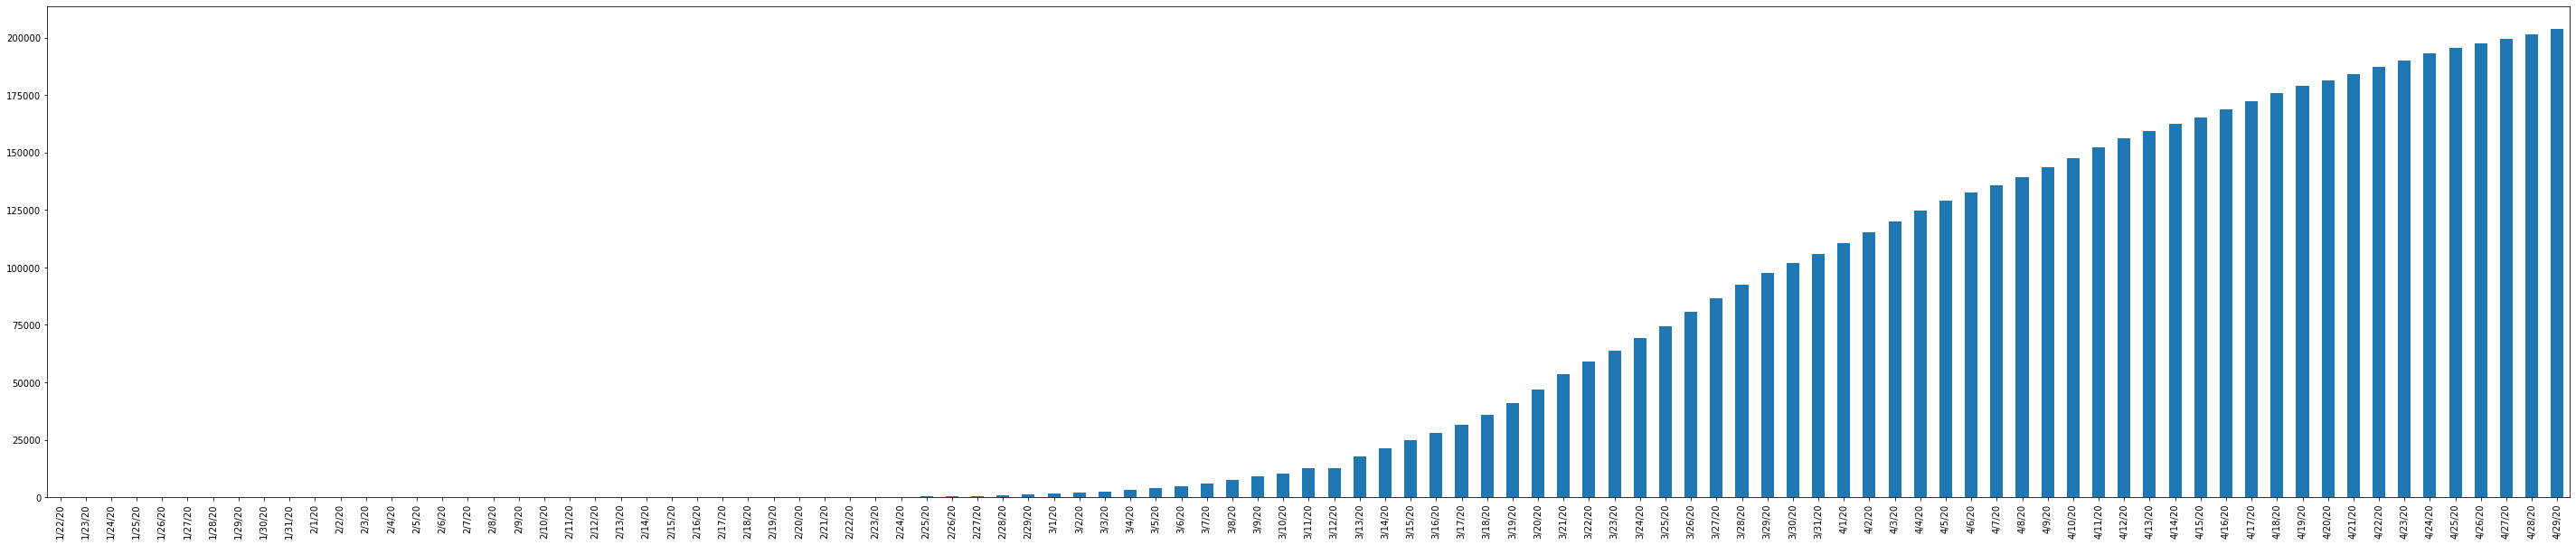

In [40]:
tempData = data.loc['Italy']
tempData.plot.bar(figsize=(50,10))
plt.show()

# COVID-19 vs. World Pop (2016)

More up to date models are available but require extensive treatment outside this notebook, mainly via excel spreadsheets.

In [41]:
sumdata = sumdata.to_frame()
popData = popData.to_frame()

df_inner = pd.merge(sumdata, popData, on='Country', how='inner')
df_inner.head()

4/29/20          0
Country                                  
Bhutan                       7   797765.0
Sao Tome and Principe        8   199910.0
Mauritania                   8  4301018.0
Papua New Guinea             8  8084991.0
Suriname                    10   558368.0

In [42]:
df_inner=df_inner.rename(columns={"4/29/20": "TotalCovid", 0: "TotalPop"})
df_inner['%Covid/Pop'] = (df_inner['TotalCovid']/df_inner['TotalPop'])*100
df_inner = df_inner.drop('Eritrea',axis=0)
df_inner = df_inner.sort_values(by='%Covid/Pop',ascending=False)
df_inner.head()

TotalCovid   TotalPop  %Covid/Pop
Country                                      
San Marino         563    33203.0    1.695630
Andorra            743    77281.0    0.961426
Luxembourg        3769   582972.0    0.646515
Iceland           1797   334252.0    0.537618
Qatar            12564  2569804.0    0.488909

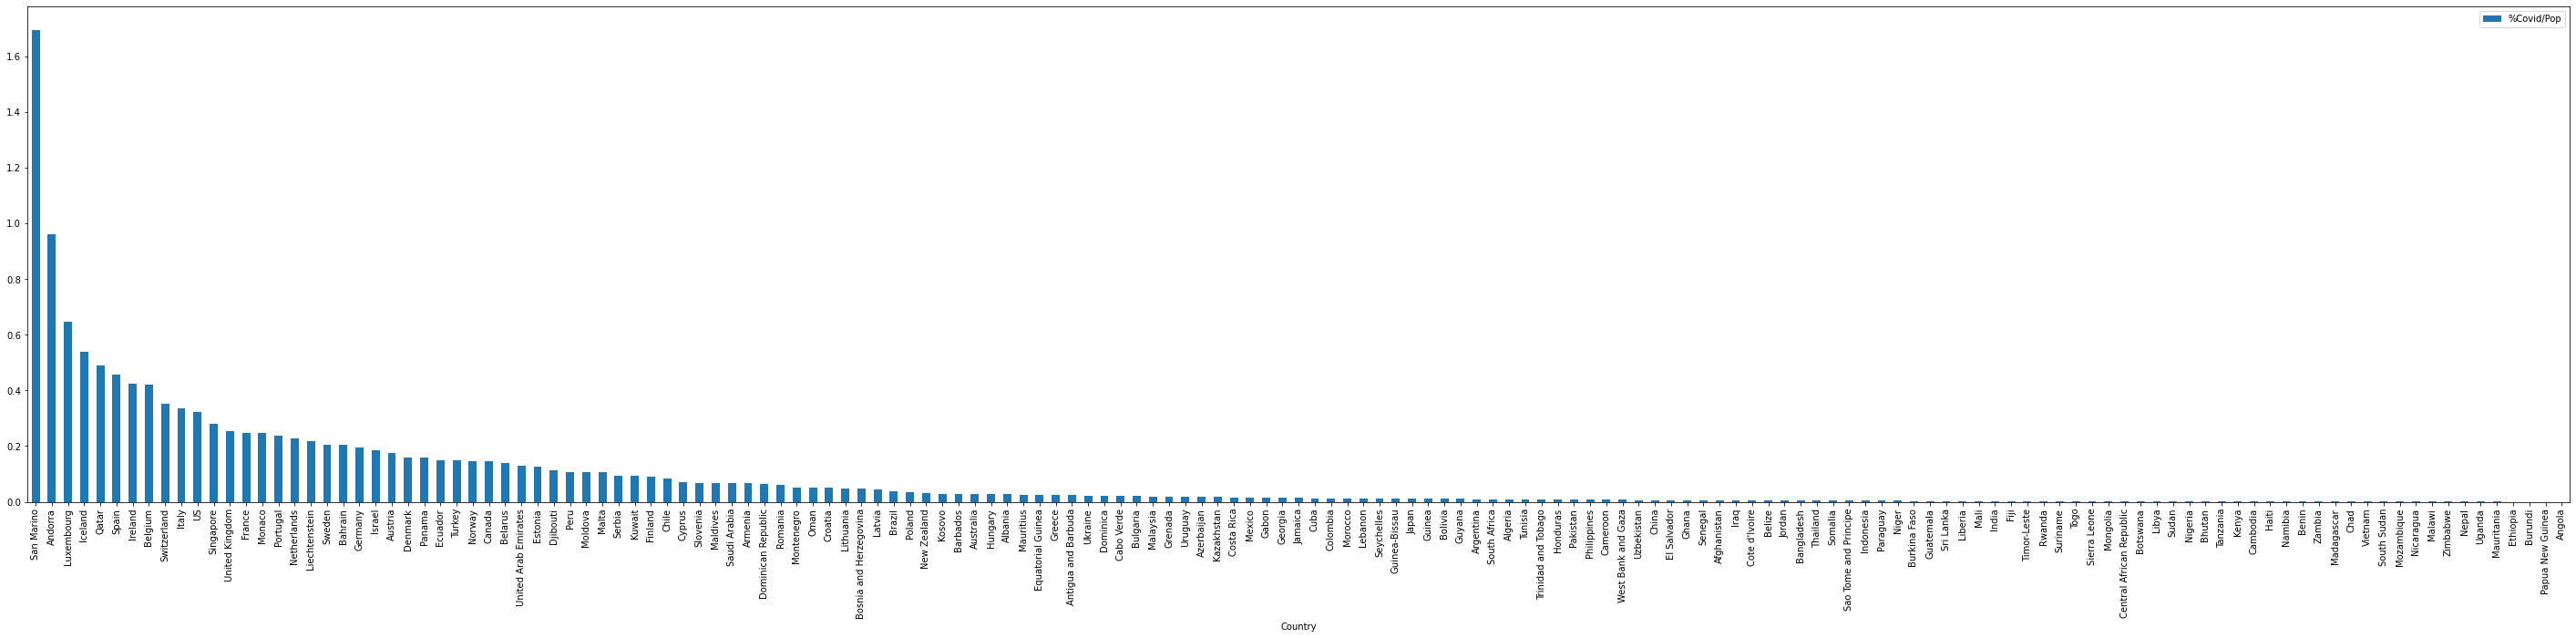

In [43]:
df_inner.plot.bar(y='%Covid/Pop', figsize=(50,10))
plt.show()

In [44]:
dfp = df_inner.sort_values(by='TotalPop',ascending=True).tail(10)
dfp

TotalCovid      TotalPop  %Covid/Pop
Country                                         
Japan            13895  1.269945e+08    0.010941
Mexico           17799  1.275404e+08    0.013956
Bangladesh        7103  1.629516e+08    0.004359
Nigeria           1728  1.859896e+08    0.000929
Pakistan         15525  1.932035e+08    0.008036
Brazil           79685  2.076529e+08    0.038374
Indonesia         9771  2.611155e+08    0.003742
US             1039909  3.231275e+08    0.321826
India            33062  1.324171e+09    0.002497
China            83944  1.378665e+09    0.006089

In [45]:
dfc = df_inner.sort_values(by='TotalCovid',ascending=True).tail(10)
dfc

TotalCovid      TotalPop  %Covid/Pop
Country                                             
Canada               52865  3.628642e+07    0.145688
Brazil               79685  2.076529e+08    0.038374
China                83944  1.378665e+09    0.006089
Turkey              117589  7.951243e+07    0.147888
Germany             161539  8.266768e+07    0.195408
United Kingdom      166441  6.563724e+07    0.253577
France              166543  6.689611e+07    0.248958
Italy               203591  6.060059e+07    0.335955
Spain               212917  4.644396e+07    0.458439
US                 1039909  3.231275e+08    0.321826

Relation between Population and Covid Spread

array([<matplotlib.axes._subplots.AxesSubplot object at 0x17B4B370>,
      dtype=object)

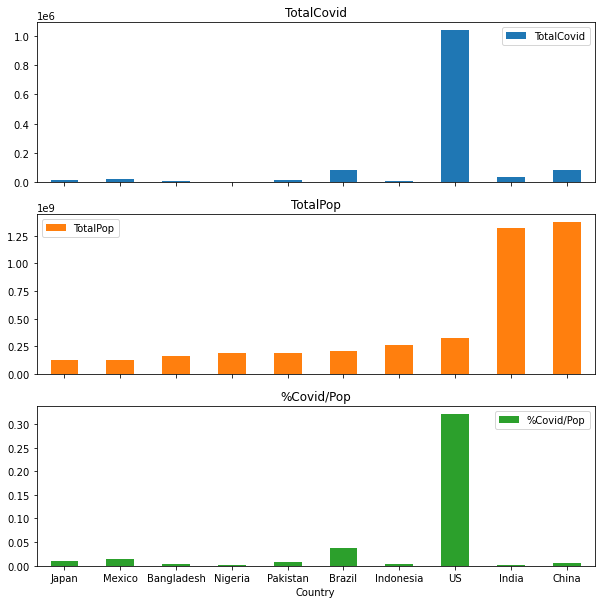

In [46]:
dfp.plot.bar(rot=0,subplots=True,figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x17B42090>,
      dtype=object)

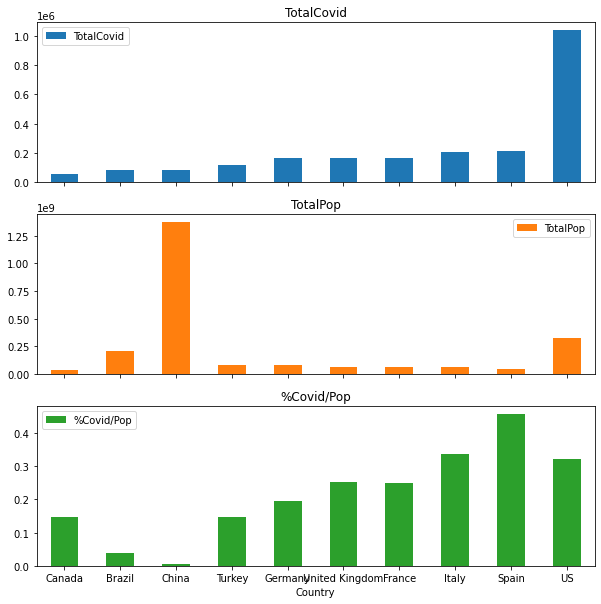

In [47]:
dfc.plot.bar(rot=0,subplots=True,figsize=(10,10))

# Foi impossivel por o QGIS a funcionar com o notebook